In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
#Reading the GDP Data
#DATA SOURCE: http://goo.gl/j1MSKe
DATA_DIR = "datasets/lifesat/"
#Encoding the Data in the STD Character Encoding: latin1
gdp_per_capital = pd.read_csv(DATA_DIR+"gdp_per_capita.csv",delimiter='\t',encoding='latin1',thousands=",")
gdp_per_capital.set_index("Country", inplace=True)
gdp_per_capital.rename(columns={"2015":"GDP Per Capital"}, inplace=True)
gdp_per_capital.dropna(inplace=True)
gdp_per_capital.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP Per Capital,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [127]:
gdp_per_c_series = pd.Series(gdp_per_capital["GDP Per Capital"])
gdp_per_capital['new GDP'] = gdp_per_c_series.astype(int)
gdp_per_capital["new Estimates Start After"] = gdp_per_capital['Estimates Start After'].astype(int)
gdp_per_capital['new GDP'].head()

Country
Afghanistan              599
Albania                 3995
Algeria                 4318
Angola                  4100
Antigua and Barbuda    14414
Name: new GDP, dtype: int64

In [55]:
gdp_per_capital.drop(["GDP Per Capital","Estimates Start After"],axis=1,inplace=True)
gdp_per_capital.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,new GDP,new Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599,2013
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995,2010
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318,2014
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100,2014
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414,2011


In [66]:
#Analysing the Data Weather all are of Same Units
gdp_per_capital["USA on Unit"] = gdp_per_capital['Units'].apply(lambda x: 0 if x !="U.S. dollars" else 1)
gdp_per_capital.head(1)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,new GDP,new Estimates Start After,USA on Unit
Country,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599,2013,1


In [68]:
#Reading the Life Satisfaction Data
#TDATA SOURCE: http://stats.oecd.org/index.aspx?DataSetCode=BLI
life_sat_oecd = pd.read_csv(DATA_DIR+"oecd_bli_2015.csv")
life_sat_oecd.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [115]:
life_sat_oecd = life_sat_oecd[life_sat_oecd['INEQUALITY']=="TOT"]
print(f"Length with TOT in INEQUALITY {len(life_sat_oecd)}")
oecd_bli_table = life_sat_oecd.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli_table['Life satisfaction'].head(2)

Length with TOT in INEQUALITY 888


Country
Australia    7.3
Austria      6.9
Name: Life satisfaction, dtype: float64

In [116]:
#Looking Up Our Pivot Table that we Have Created.
oecd_bli_table.head(3)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9


In [196]:
#Now It's Time to Train Our Machine Learning Model
#First Let's Code the Function which prepares our Testing and Training set from the CSV
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=="TOT"]
    #Creating the Pivot Table(TOP)
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={'2015':"GDP per capita"}, inplace=True)
    #Setting Country as Index for Merging with oecd_bli Dataset
    gdp_per_capita.set_index("Country", inplace=True)
    final_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,left_index=True,
                                  right_index=True)
    final_country_stats.sort_values(by="GDP per capita", inplace=True)
    #Let's Take a Limited Sample of the Sample
    all_indices = np.random.permutation(36)
    keep_indices = all_indices[:30]
    return final_country_stats[['GDP per capita','Life satisfaction']].iloc[keep_indices]

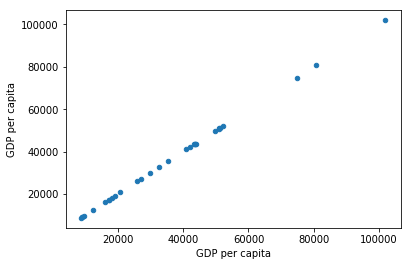

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [204]:
#Training Our Machine Learning Model, We are Using Linear Regression Model as 
#it's a Regression Problem
from sklearn import linear_model

#Loading Our data
oecd_bli = pd.read_csv(DATA_DIR+"oecd_bli_2015.csv",thousands=",")
gdp_per_capita = pd.read_csv(DATA_DIR+"gdp_per_capita.csv", thousands=",", delimiter='\t',encoding="latin1",na_values="n/a")

#Preparing Our Data for the ML Model
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#EXPO Data Annalysis
country_stats.plot(kind="scatter", y='GDP per capita', x='GDP per capita')
plt.show()

#Creating Instanceof the Linear Model
linear_model = linear_model.LinearRegression()

#Training the Model
linear_model.fit(X,y)

### Predicting the Life Satisfaction Value from the GDP Per Capita

In [208]:
pred_gdp_value = 20165
prediction = linear_model.predict([[pred_gdp_value]])
print(f'The Predicted Value \nGDP Per Capita: {pred_gdp_value} \nLife Satisfaction: {prediction}')

The Predicted Value 
GDP Per Capita: 20165 
Life Satisfaction: [[6.18389161]]
